In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

carFile = pd.read_csv('./car details.csv')

In [16]:
###### Exploring the dataset #####

print(carFile.info())

# What percentage of data is missing in this dataset?
print("\nPercentage of Missing Data:")
print(round(((carFile.isna().sum().sum() / (carFile.shape[0] * carFile.shape[1])) * 100),2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 


Make Column - Unique Values:
33

QUESTION 7:
1050

Transmission Value Counts:
Manual       1133
Automatic     926
Name: Transmission, dtype: int64

Color Value Counts:
White     802
Silver    285
Grey      220
Blue      190
Black     163
Red       154
Brown      82
Maroon     37
Gold       30
Bronze     28
Green      17
Orange     16
Others     12
Yellow      9
Beige       8
Purple      5
Pink        1
Name: Color, dtype: int64

Seller Value Counts:
Individual                 1997
Corporate                    57
Commercial Registration       5
Name: Seller Type, dtype: int64

Seating Capacity Counts:
5.0    1615
7.0     273
4.0      42
8.0      35
6.0      23
2.0       7
Name: Seating Capacity, dtype: int64

Owner Counts:
First               1619
Second               373
Third                 42
UnRegistered Car      21
Fourth                 3
4 or More              1
Name: Owner, dtype: int64


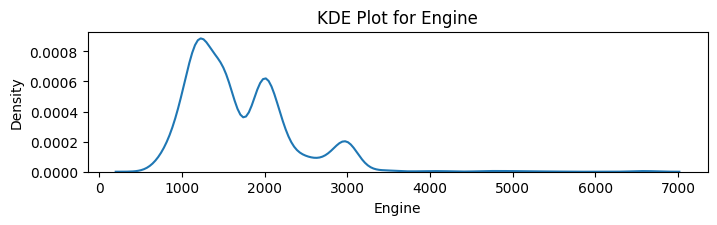

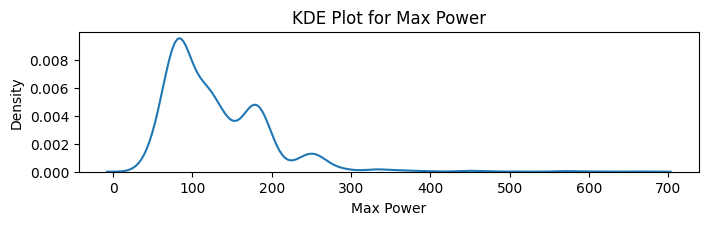

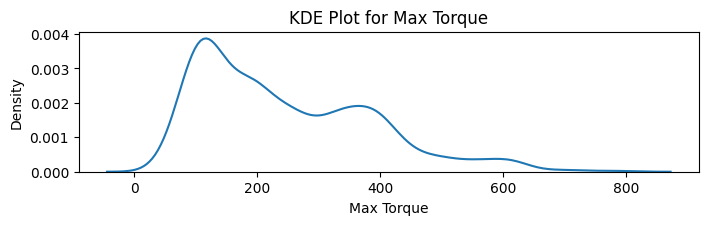

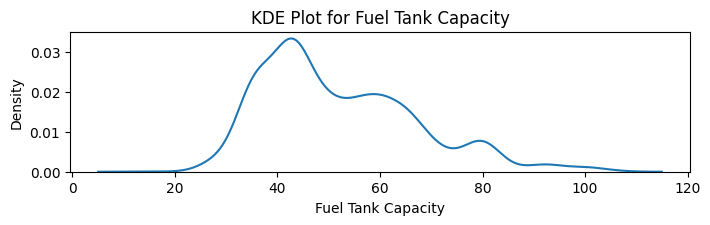

In [17]:
##### Preprocessing Data #####

#--- Make Column---#
# How many unique values are under the column Make?
print("\nMake Column - Unique Values:")
print(len(carFile['Make'].unique()))

# Dropping Make due to dimensionality
carFile.drop('Make', axis=1, inplace=True)

#--- Model Column---#
# How many unique values are under the column Model?
print("\nQUESTION 7:")
print(len(carFile['Model'].unique()))

# Dropping Model due to dimensionality
carFile.drop('Model', axis=1, inplace=True)


#--- Fuel Type Column ---#
# One hot for Fuel Type to convert categorical to numeric
one_hot_fuelType = pd.get_dummies(carFile['Fuel Type'], prefix='Fuel Type')
carFile = pd.concat([carFile, one_hot_fuelType], axis = 1)
carFile.drop('Fuel Type', axis=1, inplace=True)


#--- Transmission Column ---#
# Mapping Transmission values to 1 (most common) and 0 (other) since there are 2 values
print("\nTransmission Value Counts:")
print(carFile['Transmission'].value_counts())

carFile['Transmission'] = carFile['Transmission'].map({'Manual': 1, 'Automatic': 0}).astype(int)


#--- Location Column ---#
# Dropping Location column due to dimensionality
carFile.drop('Location', axis=1, inplace=True)


#--- Color Column ---#
# 15+ unique columns; mapping most common color to 1 and others to 0
print("\nColor Value Counts:")
print(carFile['Color'].value_counts())
mostCommonColor = carFile['Color'].value_counts().index[0]
carFile['Color'] = carFile['Color'].apply(lambda x: 1 if x == mostCommonColor else 0)


#--- Seller Type Column ---#
# Mapping most common class (Individual) to 1 and others to 0
print("\nSeller Value Counts:")
print(carFile['Seller Type'].value_counts())
carFile['Seller Type'] = carFile['Seller Type'].apply(lambda x: 1 if x == 'Individual' else 0)


#--- Engine Column ---#
# Split the Engine column to exclusively hold numerical values
carFile['Engine'] = carFile['Engine'].str.split(' cc', expand=True)[0].astype(float)

# Checking if data is distributed normally
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
sns.kdeplot(data=carFile['Engine'].astype(float))
plt.title('KDE Plot for Engine')
plt.xlabel('Engine')

# Replace missing values with the minimum value because it has right skew
carFile['Engine'].fillna(carFile['Engine'].astype(float).median(), inplace=True)


#--- Max Power Column ---#
# Question 16 - Replace Maxpower column values with bhp & what is the mean
# Split the Max Power column to exclusively hold numerical values
powerCol1 = carFile['Max Power'].str.split('@', expand=True)[0]
carFile['Max Power'] = powerCol1.str.split('bhp', expand=True)[0].astype(float)

# Checking if data is distributed normally
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
sns.kdeplot(data=carFile['Max Power'].astype(float))
plt.title('KDE Plot for Max Power')
plt.xlabel('Max Power')

# Replace missing values with the minimum value because it has right skew
carFile['Max Power'].fillna(carFile['Max Power'].median(), inplace=True)

#--- Max Torque Column ---#
# Question 18 - In Max Torque column, replace missing values with median of all values
# Split the Max Torque column to exclusively hold numerical values
torqueCol1 = carFile['Max Torque'].str.split('@', expand=True)[0]
carFile['Max Torque'] = torqueCol1.str.split('Nm', expand=True)[0].astype(float)

# Checking if data is distributed normally
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
sns.kdeplot(data=carFile['Max Torque'].astype(float))
plt.title('KDE Plot for Max Torque')
plt.xlabel('Max Torque')

# Replace missing values with the minimum value because it has right skew
carFile['Max Torque'].fillna(carFile['Max Torque'].astype(float).median(), inplace=True)


#--- Drivetrain Column ---#
# Replace missing values with most frequent class (categorical column)
carFile['Drivetrain'].fillna(carFile['Drivetrain'].mode()[0], inplace=True)

# Convert categorical to one-hot
drivetrain_hot = pd.get_dummies(carFile['Drivetrain'], prefix='Drivetrain')
carFile = pd.concat([carFile, drivetrain_hot], axis=1)
carFile.drop('Drivetrain', axis=1, inplace=True)


#--- Length, Width, Height Columns ---#
# Question 20 - Replacing missing values for L, W, H with median
carFile['Length'].fillna(carFile['Length'].median(), inplace=True)
carFile['Width'].fillna(carFile['Width'].median(), inplace=True)
carFile['Height'].fillna(carFile['Height'].median(), inplace=True)


#--- Seating Capacity Column ---#
#
print("\nSeating Capacity Counts:")
print(carFile['Seating Capacity'].value_counts())
carFile['Seating Capacity'].fillna(carFile['Seating Capacity'].mode()[0], inplace=True)
carFile['Seating Capacity'] = carFile['Seating Capacity'].astype(int)


#--- Fuel Tank Capacity Column ---#
# Checking if data is distributed normally
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
sns.kdeplot(data=carFile['Fuel Tank Capacity'].astype(float))
plt.title('KDE Plot for Fuel Tank Capacity')
plt.xlabel('Fuel Tank Capacity')

carFile['Fuel Tank Capacity'].fillna(carFile['Fuel Tank Capacity'].median(), inplace=True)
carFile['Fuel Tank Capacity'] = carFile['Fuel Tank Capacity'].astype(int)

#--- Owner Column ---#
print("\nOwner Counts:")
print(carFile['Owner'].value_counts())
carFile['Owner'] = carFile['Owner'].apply(lambda x: 1 if x == 'First' else 0)

# Question 24 - Info
# print("\nQuestion 24:")
# print(carFile.info())

In [18]:
##### POST PROCESS INFO #####
carFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   2059 non-null   int64  
 1   Year                    2059 non-null   int64  
 2   Kilometer               2059 non-null   int64  
 3   Transmission            2059 non-null   int64  
 4   Color                   2059 non-null   int64  
 5   Owner                   2059 non-null   int64  
 6   Seller Type             2059 non-null   int64  
 7   Engine                  2059 non-null   float64
 8   Max Power               2059 non-null   float64
 9   Max Torque              2059 non-null   float64
 10  Length                  2059 non-null   float64
 11  Width                   2059 non-null   float64
 12  Height                  2059 non-null   float64
 13  Seating Capacity        2059 non-null   int64  
 14  Fuel Tank Capacity      2059 non-null   

In [19]:
################################LAB 2#####################################
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

############## Question 1 - Find the median of Kilometer
print("\nLab 2 - Question 1:")

df = carFile

# Setting up X dataframe and y (target) dataframe
X = df[['Price','Year', 'Kilometer', 'Transmission', 'Color', 'Owner',
       'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Length', 'Width',
       'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Fuel Type_CNG',
       'Fuel Type_CNG + CNG', 'Fuel Type_Diesel', 'Fuel Type_Electric',
       'Fuel Type_Hybrid', 'Fuel Type_LPG', 'Fuel Type_Petrol',
       'Fuel Type_Petrol + CNG', 'Fuel Type_Petrol + LPG', 'Drivetrain_AWD',
       'Drivetrain_FWD', 'Drivetrain_RWD']]
y = df['Price']

X = df.drop('Price', axis = 1)
y = df['Price']

print(X.columns)

#--- Scaling the dataset ---#
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)



Lab 2 - Question 1:
Index(['Year', 'Kilometer', 'Transmission', 'Color', 'Owner', 'Seller Type',
       'Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'Fuel Type_CNG',
       'Fuel Type_CNG + CNG', 'Fuel Type_Diesel', 'Fuel Type_Electric',
       'Fuel Type_Hybrid', 'Fuel Type_LPG', 'Fuel Type_Petrol',
       'Fuel Type_Petrol + CNG', 'Fuel Type_Petrol + LPG', 'Drivetrain_AWD',
       'Drivetrain_FWD', 'Drivetrain_RWD'],
      dtype='object')


In [20]:
#--- Creating Train Test Split ---#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [21]:
# Identifying columns that have high correlation with the target variable
from scipy.stats import pearsonr

highest_corr = -2
highest_col = None

for column in X_train.columns:
  correlation_coefficient, _ = pearsonr(X_train[column], y_train)

  if correlation_coefficient > highest_corr:
    highest_corr = correlation_coefficient
    highest_col = column

print(f"Column: {highest_col}")
print(f"Correlation Coefficient: {highest_corr}")


Column: Max Power
Correlation Coefficient: 0.7644529915523791


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [22]:
# SIMPLE LINEAR REGRESSION #
# Using the highest correlated column found above, fitting SLR model

import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

x = X_train['Max Power']
x = sm.add_constant(x)

model = sm.OLS(y_train,x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2313.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          6.04e-316
Time:                        21:07:21   Log-Likelihood:                -25788.
No. Observations:                1647   AIC:                         5.158e+04
Df Residuals:                    1645   BIC:                         5.159e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.699e+06   3.76e+04     45.135      0.000    1.62e+06    1.77e+06
Max Power   1.841e+06   3.83e+04     48.094      0.000    1.77e+06    1.92e+06
==============================================================================
Omnibus:                     1611.131   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           201070.834
Skew:                           4.259   Prob(JB):                         0.00
Kurtosis:                      56.455   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

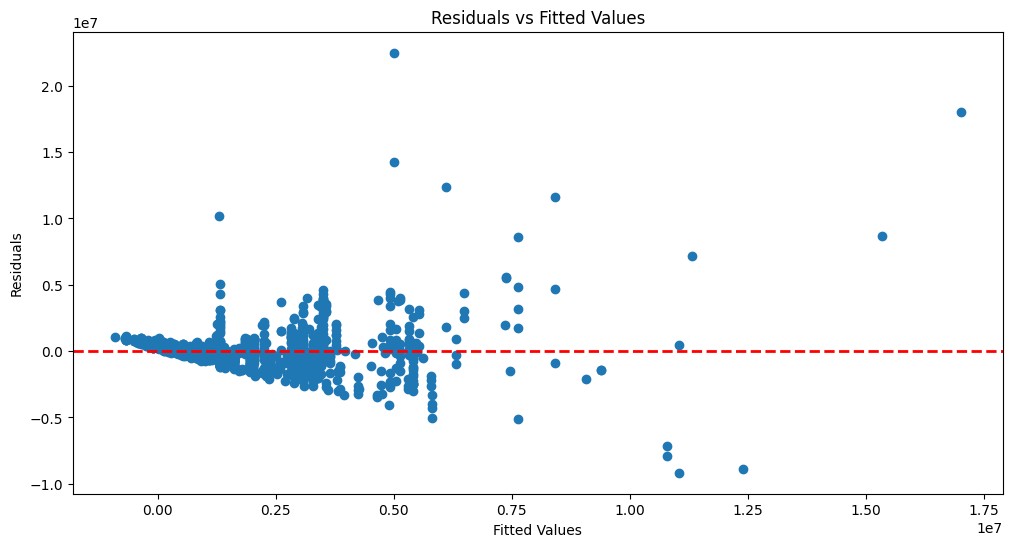

<Figure size 1200x600 with 0 Axes>

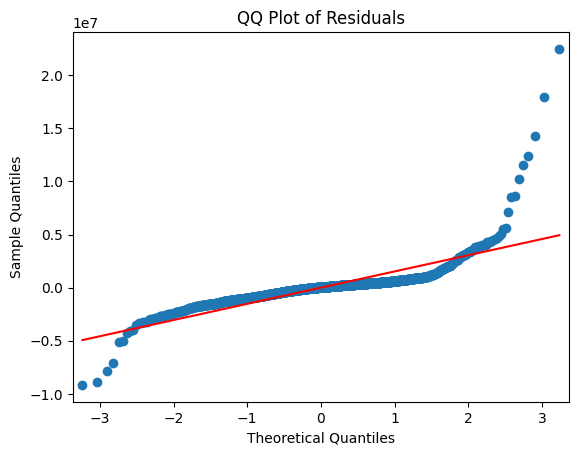

In [24]:
from statsmodels.graphics.gofplots import qqplot

# Plotting Residuals vs Fitted to validate if statistically valid based on assumptions
# Zero Mean of Residuals, Equal Variance of Residuals, Independence of Errors

y_pred = model.predict(x)

# Residuals vs Fitted Values plot
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, model.resid)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()


# QQ plot used to see if errors follow normal distribution
# QQ plot
plt.figure(figsize=(12, 6))
qqplot(model.resid, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

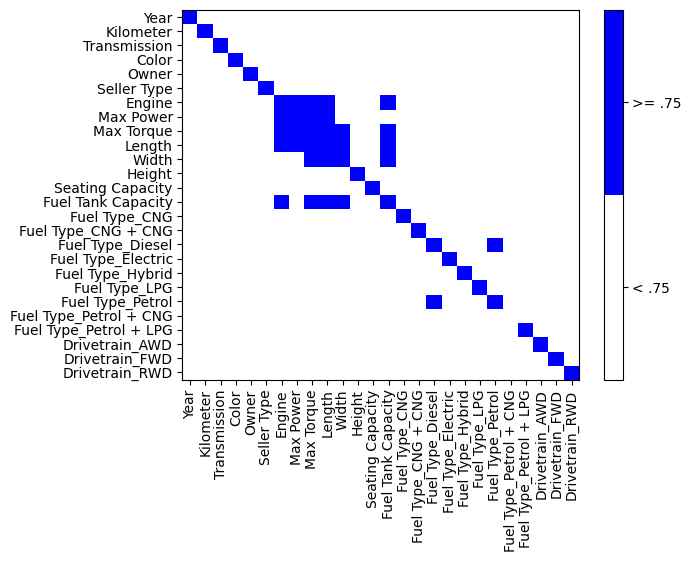

In [25]:
#--- Multiple Linear Regression ---#
# Using OLS, finding columns with correlation and dropping to address multicollinearity

corr_matrix = np.corrcoef(X_train.T)

threshold = .75

mask = np.abs(corr_matrix) >= threshold
cmap = plt.cm.colors.ListedColormap(['white','blue'])

plt.imshow(mask, cmap=cmap, aspect='auto')

plt.xticks(range(X_train.shape[1]), X_train.columns, rotation='vertical')
plt.yticks(range(X_train.shape[1]), X_train.columns)

color_bar = plt.colorbar()
color_bar.set_ticks([.25, .75])
color_bar.set_ticklabels(['< .75', '>= .75'])
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          7.40e-280
Time:                        21:23:21   Log-Likelihood:                -25822.
No. Observations:                1647   AIC:                         5.168e+04
Df Residuals:                    1628   BIC:                         5.178e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.698e+06   3

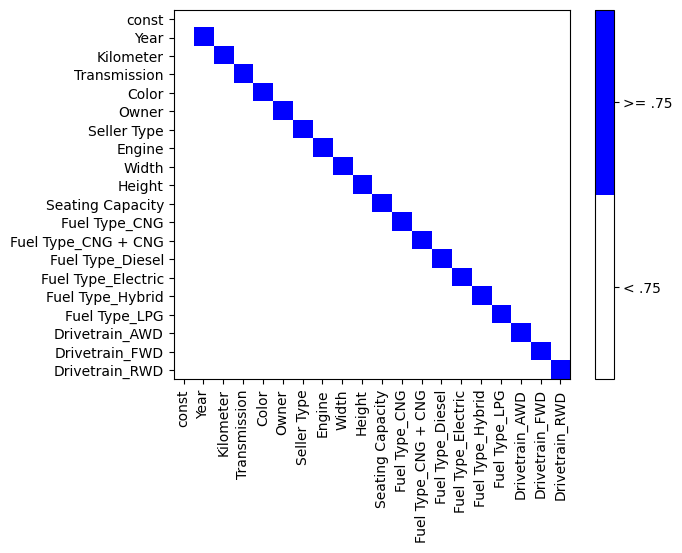

In [27]:
# Dropping correlated columns (by dictionary order) and retraining model

drop_cols = ['Max Power', 'Max Torque', 'Length', 'Fuel Tank Capacity', 'Fuel Type_Petrol', 'Fuel Type_Petrol + LPG', 'Fuel Type_Petrol + CNG']

X_train_MLR = X_train.drop(columns=drop_cols, axis=1)

X_train_MLR = sm.add_constant(X_train_MLR)
model = sm.OLS(y_train, X_train_MLR).fit()

print(model.summary())


# Ensuring multicollinearity is addressed
corr_matrix = np.corrcoef(X_train_MLR.T)

threshold = .75

mask = np.abs(corr_matrix) >= threshold
cmap = plt.cm.colors.ListedColormap(['white','blue'])

plt.imshow(mask, cmap=cmap, aspect='auto')

plt.xticks(range(X_train_MLR.shape[1]), X_train_MLR.columns, rotation='vertical')
plt.yticks(range(X_train_MLR.shape[1]), X_train_MLR.columns)

color_bar = plt.colorbar()
color_bar.set_ticks([.25, .75])
color_bar.set_ticklabels(['< .75', '>= .75'])
plt.show()



Index(['const', 'Year', 'Kilometer', 'Transmission', 'Color', 'Owner',
       'Seller Type', 'Engine', 'Width', 'Height', 'Seating Capacity',
       'Fuel Type_CNG', 'Fuel Type_CNG + CNG', 'Fuel Type_Diesel',
       'Fuel Type_Electric', 'Fuel Type_Hybrid', 'Fuel Type_LPG',
       'Drivetrain_AWD', 'Drivetrain_FWD', 'Drivetrain_RWD'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     176.4
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          2.98e-284
Time:                        21:34:50   Log-Likelihood:                -25827.
No. Observations:                1647   AIC:                         5.168e+04
Df Residuals:                    1634   BIC:                         5.175e+04
Df Model:

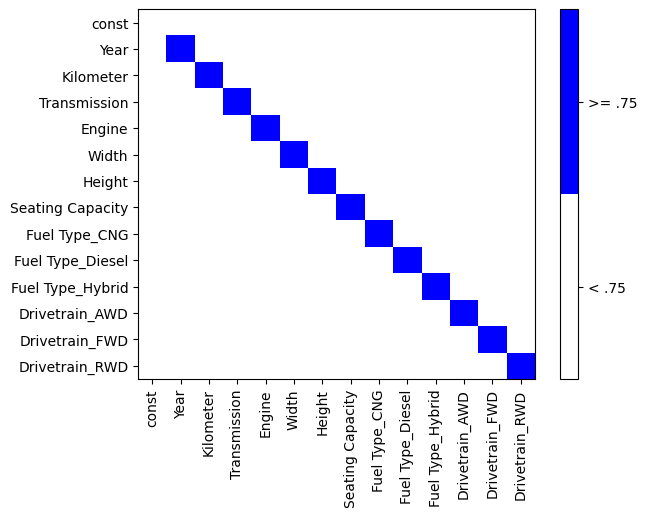

In [28]:
# Drop columns with p value > .05 since they are not statistically significant

drop_cols_p = ['Color', 'Owner', 'Seller Type', 'Fuel Type_CNG + CNG', 'Fuel Type_Electric', 'Fuel Type_LPG']
print(X_train_MLR.columns)

X_train_MLR = X_train_MLR.drop(columns=drop_cols_p, axis=1)

X_train_MLR = sm.add_constant(X_train_MLR)
model = sm.OLS(y_train, X_train_MLR).fit()

# Print model summary to verify p-values <= 0.05
print(model.summary())


corr_matrix = np.corrcoef(X_train_MLR.T)

threshold = .75

mask = np.abs(corr_matrix) >= threshold
cmap = plt.cm.colors.ListedColormap(['white','blue'])

plt.imshow(mask, cmap=cmap, aspect='auto')

plt.xticks(range(X_train_MLR.shape[1]), X_train_MLR.columns, rotation='vertical')
plt.yticks(range(X_train_MLR.shape[1]), X_train_MLR.columns)

color_bar = plt.colorbar()
color_bar.set_ticks([.25, .75])
color_bar.set_ticklabels(['< .75', '>= .75'])
plt.show()

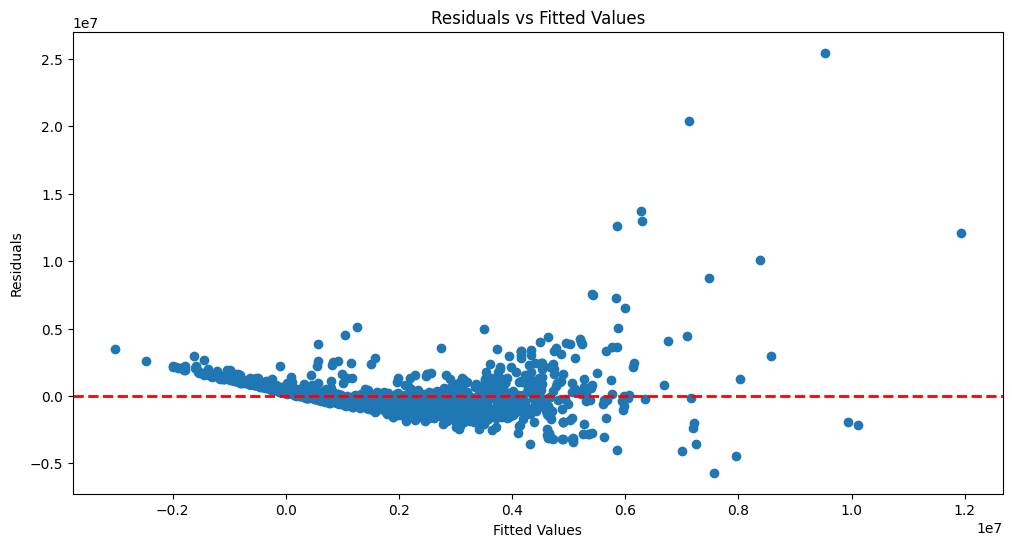

In [30]:
# Residuals vs Fitted Plot to validate model by assessing assumptions such as normality, independence, and constant error variance

y_pred = model.predict(X_train_MLR)

# Residuals vs Fitted Values plot
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, model.resid)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

In [31]:
# Training a LinearRegression model in sklearn on X_train and y_train

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

r_squared = lreg.score(X_train, y_train)
print(r_squared)

0.6782289951975271


In [32]:
# R2-Score of scaled test dataset
from sklearn.metrics import r2_score

y_test_pred = lreg.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)

print(r2_test)

0.6819694283071711


In [33]:
# Assessing SGDRegressor model
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(random_state=0, max_iter=2000)

sgd_model.fit(X_train, y_train)

iterations_to_converge = sgd_model.n_iter_


print(f"SGDRegressor Score: {sgd_model.score(X_test, y_test)}")

SGDRegressor Score: 0.6773230722247372


In [36]:
# Assessing DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(dt_model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(dt_model.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.66


In [37]:
# Assessing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(rf_model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(rf_model.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.92
